In [ ]:
#hide
import numpy as np
import matplotlib.pyplot as plt
from seqdist.utils import *
from seqdist import ctc

# Seqdist

> Probability distributions over sequences in pytorch and cupy.

## Install

`pip install seqdist`

## How to use

Comparison against builtin pytorch implementation of the standard CTC loss:

In [ ]:
sample_inputs = logits, targets, input_lengths, target_lengths = ctc.generate_sample_inputs(T_min=450, T_max=500, N=128, C=20, L_min=80, L_max=100)
print('pytorch loss: {:.4f}'.format(ctc.loss_pytorch(*sample_inputs)))
print('seqdist loss: {:.4f}'.format(ctc.loss_cupy(*sample_inputs)))

pytorch loss: 12.8080
seqdist loss: 12.8080


### Speed comparison

Pytorch:

In [ ]:
report(benchmark_fwd_bwd(ctc.loss_pytorch, *sample_inputs))

fwd: 4.79ms (4.17-5.33ms)
bwd: 9.69ms (8.33-10.88ms)
tot: 14.47ms (12.67-16.20ms)


MCTC:

In [ ]:
report(benchmark_fwd_bwd(ctc.loss_cupy, *sample_inputs))

fwd: 7.22ms (6.78-7.85ms)
bwd: 6.21ms (5.82-8.57ms)
tot: 13.43ms (12.63-16.41ms)


### Alignments

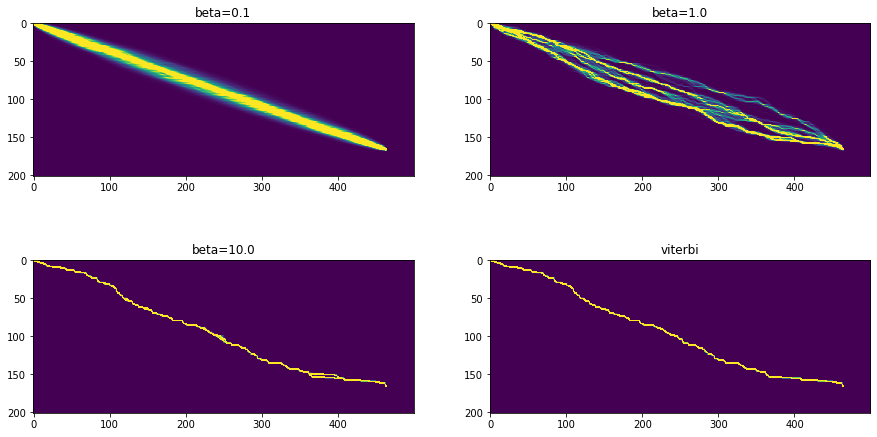

In [ ]:
betas = [0.1, 1.0, 10.]
alignments = {'beta={:.1f}'.format(beta): to_np(ctc.soft_alignments(*sample_inputs, beta=beta)) for beta in betas}
alignments['viterbi'] = to_np(ctc.viterbi_alignments(*sample_inputs))
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
for (ax, (title, data)) in zip(np.array(axs).flatten(), alignments.items()):
    ax.imshow(data[:, 0].T, vmax=0.05);
    ax.set_title(title)  